<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT

###  This is a cars dataset having 156 observation and 16 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of cars.

#### Note: Please run your code step by step as provided in the sheet or else you may face challenges with the code.

### Import the dataset.

In [1]:
import pandas as pd
car = pd.read_csv("./car_sales_clean.csv",encoding="latin_1")
car.drop('Unnamed: 0',axis=1,inplace=True)
car.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive,engV_cat,age,age_Group,price_cat,mpy,mpy_cat
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,Moderate,6,3-6,Moderate,11.33,Moderate
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear,Low,5,3-6,Moderate,34.60,Extreme
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear,High,8,6-10,Moderate,16.88,High
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front,Low,4,3-6,Moderate,40.50,Extreme
4,Mercedes-Benz,33000.0,vagon,91.0,1.9,Other,yes,2013,E-Class,rear,Low,3,1-3,Moderate,30.33,Extreme


### Check the shape of the dataset.

In [2]:
def lr():
    return car.shape 
lr()

(9095, 16)

### Check the descriptive stats of the dataset.

In [3]:
def lr():
    return car.describe()
lr()

,price,mileage,engV,year,age,mpy
count,9095.000000,9095.000000,9095.000000,9095.000000,9095.000000,9095.000000
mean,16375.589933,141.662397,2.228299,2006.566245,9.433755,17.030325
std,24789.196724,97.715494,0.946221,6.887195,6.887195,12.948138
min,259.350000,0.000000,0.900000,1959.000000,0.000000,0.000000
25%,5500.000000,74.000000,1.600000,2004.000000,5.000000,11.250000
50%,9555.000000,130.000000,2.000000,2008.000000,8.000000,15.730000
75%,17000.000000,197.000000,2.500000,2011.000000,12.000000,21.000000
max,547800.000000,999.000000,6.750000,2016.000000,57.000000,410.000000


### Q 1. Write a code to understand the total count and percentage of missing values.

In [4]:
def lr():
    total = car.isnull().sum().sort_values(ascending=False)
    percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

              Total  Percent
mpy_cat           0      0.0
mpy               0      0.0
price_cat         0      0.0
age_Group         0      0.0
age               0      0.0
engV_cat          0      0.0
drive             0      0.0
model             0      0.0
year              0      0.0
registration      0      0.0
engType           0      0.0
engV              0      0.0
mileage           0      0.0
body              0      0.0
price             0      0.0
car               0      0.0


### Q 2. Impute the missing value using "median" groupby Manufacturer. 

In [5]:

# def lr():
#     car["Sales_in_thousands"].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
#     return
# lr()
# print (car.isnull().sum())

### Q 3. Create a dummy variable for "body",  "drive" & "engType" and  drop the original variable.

In [6]:
car_dummy =pd.DataFrame()                                             # Creating an empty data frame
def lr(car):
    dummies = pd.get_dummies(car, columns=['body','drive','engType','registration'], drop_first=True)
    return dummies
car_dummy = lr(car)
print(car_dummy.head())
print(car_dummy.columns)

             car    price  mileage  engV  year    model  engV_cat  age  \
0           Ford  15500.0     68.0   2.5  2010     Kuga  Moderate    6   
1  Mercedes-Benz  20500.0    173.0   1.8  2011  E-Class       Low    5   
2  Mercedes-Benz  35000.0    135.0   5.5  2008   CL 550      High    8   
3  Mercedes-Benz  17800.0    162.0   1.8  2012    B 180       Low    4   
4  Mercedes-Benz  33000.0     91.0   1.9  2013  E-Class       Low    3   

  age_Group price_cat        ...         body_other body_sedan  body_vagon  \
0       3-6  Moderate        ...                  0          0           0   
1       3-6  Moderate        ...                  0          1           0   
2      6-10  Moderate        ...                  1          0           0   
3       3-6  Moderate        ...                  0          0           0   
4       1-3  Moderate        ...                  0          0           1   

   body_van  drive_full  drive_rear  engType_Gas  engType_Other  \
0         0        

### Q 4. Drop the below mentioned variables which will not help in prediction of sales.
``` ['car', 'model', 'engV_cat','age_Group','price_cat','mpy_cat' ] ```

In [7]:
def lr(car_dummy):
    car_drop = car_dummy.drop(car_dummy[['car', 'model', 'engV_cat','age_Group','price_cat','mpy_cat' ]], axis=1)
    return car_drop
car_dummy = lr(car_dummy)
print (car_dummy)

           price  mileage  engV  year  age    mpy  body_hatch  body_other  \
0      15500.000     68.0  2.50  2010    6  11.33           0           0   
1      20500.000    173.0  1.80  2011    5  34.60           0           0   
2      35000.000    135.0  5.50  2008    8  16.88           0           1   
3      17800.000    162.0  1.80  2012    4  40.50           0           0   
4      33000.000     91.0  1.90  2013    3  30.33           0           0   
5      16600.000     83.0  2.00  2013    3  27.67           0           0   
6       6500.000    199.0  2.00  2003   13  15.31           0           0   
7      10500.000    185.0  1.50  2011    5  37.00           0           0   
8      21500.000    146.0  1.80  2012    4  36.50           0           0   
9      22700.000    125.0  2.20  2010    6  20.83           0           0   
10     20447.154      0.0  1.20  2016    0   0.00           0           0   
11     20400.000    190.0  1.80  2011    5  38.00           0           0   

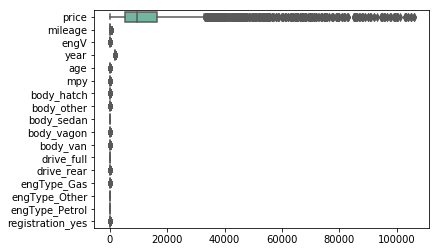

In [45]:
def lr():
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    plt.show()
    return None 
lr()

### Q 5. Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [9]:
def lr(car_dummy):
    import pandas as pd
    Q1 = car_dummy.quantile(0.05)
    Q3 = car_dummy.quantile(0.95)
    Q_diff = Q3 - Q1
    car_out = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
    print(car_dummy[((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)])
    return car_out
car_dummy = lr(car_dummy)
# print (car_dummy)
print (car_dummy.columns)
car_dummy.describe()

           price  mileage  engV  year  age     mpy  body_hatch  body_other  \
4      33000.000     91.0  1.90  2013    3   30.33           0           0   
16    129222.000      2.0  5.00  2016    0    0.00           0           0   
19    167449.500      0.0  4.40  2016    0    0.00           0           0   
29     13980.000     31.0  1.00  2013    3   10.33           1           0   
30     17300.000     24.0  1.00  2013    3    8.00           1           0   
36      2850.000    260.0  2.50  1999   17   15.29           0           0   
38    200000.000     19.0  3.50  2013    3    6.33           0           0   
40     13275.000     12.0  1.00  2013    3    4.00           1           0   
54     17000.000     38.0  1.00  2013    3   12.67           1           0   
64    195000.000      0.0  4.50  2016    0    0.00           0           0   
73    114900.000     25.0  4.80  2013    3    8.33           0           0   
114   107999.000      0.0  2.98  2016    0    0.00           0  

,price,mileage,engV,year,age,mpy,body_hatch,body_other,body_sedan,body_vagon,body_van,drive_full,drive_rear,engType_Gas,engType_Other,engType_Petrol,registration_yes
count,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.000000,8566.0,8566.000000,8566.000000
mean,14172.837028,142.834170,2.206610,2006.437777,9.562223,16.865761,0.123512,0.081135,0.388629,0.078450,0.113472,0.261616,0.149078,0.194607,0.0,0.477352,0.939879
std,15223.426976,91.935885,0.909738,6.758034,6.758034,9.901893,0.329043,0.273058,0.487467,0.268894,0.317187,0.439540,0.356186,0.395921,0.0,0.499516,0.237726
min,280.000000,0.000000,0.900000,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5500.000000,77.000000,1.600000,2004.000000,5.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,9499.000000,131.000000,2.000000,2008.000000,8.000000,15.855000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,16500.000000,198.000000,2.500000,2011.000000,12.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,106000.000000,600.000000,6.500000,2016.000000,47.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Q 6. Write code to standardize the variable for model building (return value will be numpy.ndarray).

In [10]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['price']], axis=1)
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(car_modify)
    st = scaler.transform(car_modify)
    return st
std = lr(car_modify)
print(std.shape)
print(car_modify.head())
print(std[1])

(8566, 16)
   mileage  engV  year  age    mpy  body_hatch  body_other  body_sedan  \
0     68.0   2.5  2010    6  11.33           0           0           0   
1    173.0   1.8  2011    5  34.60           0           0           1   
2    135.0   5.5  2008    8  16.88           0           1           0   
3    162.0   1.8  2012    4  40.50           0           0           0   
5     83.0   2.0  2013    3  27.67           0           0           0   

   body_vagon  body_van  drive_full  drive_rear  engType_Gas  engType_Other  \
0           0         0           1           0            1              0   
1           0         0           0           1            1              0   
2           0         0           0           1            0              0   
3           0         1           0           0            0              0   
5           0         0           1           0            0              0   

   engType_Petrol  registration_yes  
0               0              

### Q 7. Write a code to create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['mileage', 'engV', 'year', 'age', 'mpy', 'body_hatch',
       'body_other', 'body_sedan', 'body_vagon', 'body_van', 'drive_full',
       'drive_rear', 'engType_Gas', 'engType_Other', 'engType_Petrol',
       'registration_yes'] ```

In [11]:
columns = ['mileage', 'engV', 'year', 'age', 'mpy', 
           'body_hatch','body_other', 'body_sedan', 
           'body_vagon', 'body_van', 'drive_full','drive_rear', 
           'engType_Gas', 'engType_Other', 'engType_Petrol',
           'registration_yes']
def lr(std):
    cars= pd.DataFrame(std)
    cars.columns = columns
    return cars
cars = lr(std)
print(cars.head())
print(cars.shape)

    mileage      engV      year       age       mpy  body_hatch  body_other  \
0 -0.814030  0.322518  0.527140 -0.527140 -0.559094   -0.375388   -0.297151   
1  0.328137 -0.446979  0.675121 -0.675121  1.791099   -0.375388   -0.297151   
2 -0.085218  3.620363  0.231179 -0.231179  0.001438   -0.375388    3.365290   
3  0.208482 -0.446979  0.823101 -0.823101  2.386980   -0.375388   -0.297151   
4 -0.650863 -0.227122  0.971082 -0.971082  1.091192   -0.375388   -0.297151   

   body_sedan  body_vagon  body_van  drive_full  drive_rear  engType_Gas  \
0   -0.797289   -0.291767 -0.357765    1.680000   -0.418564     2.034348   
1    1.254251   -0.291767 -0.357765   -0.595238    2.389123     2.034348   
2   -0.797289   -0.291767 -0.357765   -0.595238    2.389123    -0.491558   
3   -0.797289   -0.291767  2.795131   -0.595238   -0.418564    -0.491558   
4   -0.797289   -0.291767 -0.357765    1.680000   -0.418564    -0.491558   

   engType_Other  engType_Petrol  registration_yes  
0            0.

### Q 8: Now since all variable may not be of use, please extract only the following variables for training. Preparing X (independent features) for the model building.

```['mileage', 'engV', 'year', 'age', 'mpy', 
           'body_hatch','body_other', 'body_sedan', 
           'body_vagon', 'body_van', 'drive_full','drive_rear', 
           'engType_Gas', 'engType_Other','engType_Petrol',
           'registration_yes']```

In [12]:
X = pd.DataFrame()
feature_cols = ['mileage', 'engV', 'age','drive_full','drive_rear',
               'engType_Gas', 'engType_Petrol','registration_yes']                
def lr(cars):
    X = cars[feature_cols]
    return X
X = lr(cars)
print(X)

       mileage      engV       age  drive_full  drive_rear  engType_Gas  \
0    -0.814030  0.322518 -0.527140    1.680000   -0.418564     2.034348   
1     0.328137 -0.446979 -0.675121   -0.595238    2.389123     2.034348   
2    -0.085218  3.620363 -0.231179   -0.595238    2.389123    -0.491558   
3     0.208482 -0.446979 -0.823101   -0.595238   -0.418564    -0.491558   
4    -0.650863 -0.227122 -0.971082    1.680000   -0.418564    -0.491558   
5     0.610960 -0.227122  0.508725   -0.595238   -0.418564    -0.491558   
6     0.458671 -0.776763 -0.675121   -0.595238   -0.418564    -0.491558   
7     0.034437 -0.446979 -0.823101   -0.595238    2.389123     2.034348   
8    -0.193996 -0.007266 -0.527140   -0.595238    2.389123    -0.491558   
9    -1.553719 -1.106548 -1.415024   -0.595238   -0.418564    -0.491558   
10    0.513060 -0.446979 -0.675121   -0.595238    2.389123     2.034348   
11    0.230237 -0.446979 -0.823101   -0.595238    2.389123     2.034348   
12    0.621837 -0.666835 

### Check for the type and shape of X.

In [13]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(8566, 8)


### Q 9. Extract y (dependent variable) for model building.
```['Sales_in_thousands']```

In [14]:
y = pd.DataFrame()
def lr(car_dummy):
    y = car_dummy['price']
    return y
y = lr(car_dummy)
print(y.head())

0    15500.0
1    20500.0
2    35000.0
3    17800.0
5    16600.0
Name: price, dtype: float64


### Check for the type and shape of y. 

In [15]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(8566,)


<a id=section403></a>

### Q 10. Split the value of X and y into train and test datasets.

In [16]:
from sklearn.cross_validation import train_test_split
test_size=0.30
def lr():
    return train_test_split(X, y, test_size=test_size, random_state=1)
X_train, X_test, y_train, y_test = lr()

C:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Check the shape of  X and y of train dataset.

In [17]:
def lr():
    print(X_train.shape)
    print(y_train.shape)
lr()

(5996, 8)
(5996,)


### Check the shape of X and y of test dataset.

In [18]:
def lr():
    print(X_test.shape)
    print(y_test.shape)
lr()

(2570, 8)
(2570,)


<a id=section404></a>

### Q 11. Instantiate Linear regression model using scikit-learn

In [19]:
from sklearn.linear_model import LinearRegression
def lr():
    linreg = LinearRegression()
    return linreg
linreg = lr()

### Q12. Fit the linear model on X_train and y_train.

In [20]:
def lr():
    model_lin = linreg.fit(X_train, y_train)
#     print(model_lin.summary)
lr()

<a id=section405></a>

### Q 13. Interpret the Model Coefficients.

In [21]:
def lr():
    print('Intercept:',linreg.intercept_)                                            
    print('Coefficients:',linreg.coef_)
lr()

Intercept: 14243.371001983995
Coefficients: [-4084.59588558  6090.98867019 -4270.42756662  3326.33689799
  1401.6407404  -2570.31116088 -2177.95578181  1222.38914846]


### Q.14 Zip the features to pair the feature names with the coefficients.

In [22]:
def lr():
    feature_cols.insert(0,'Intercept')
#     print(feature_cols)
    coef = linreg.coef_.tolist()
#     print(coef)
    coef.insert(0, linreg.intercept_)
    eq1 = zip(feature_cols, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()

Intercept 14243.371001983995
mileage -4084.595885578194
engV 6090.98867018796
age -4270.427566620551
drive_full 3326.3368979881
drive_rear 1401.6407404048268
engType_Gas -2570.311160875864
engType_Petrol -2177.955781814203
registration_yes 1222.3891484581711


###  Q 15. Predict the train value using the built model.

In [23]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['price']
    head = pred.head()
    return head
lr()

,price
0,40719.478588
1,12618.551199
2,11938.377274
3,17055.139154
4,12087.438929


### Q 16. Predict the test value using the built model.

In [24]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['price']
    head = pred_test.head()
    return head
lr()

,price
0,37485.380402
1,-2815.466743
2,15233.979056
3,31791.786055
4,14838.395704


<a id=section406></a>

### Q 17 Evaluate the model using Mean Absolute Error metrics for both train and test.

In [25]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 6279.408621202258
MAE for test set is 6161.36238164711


### Q 18 Evaluate the model using Mean Squared Error for both train and test.

In [26]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 93768225.04021226
MSE for test set is 90962028.43094401


### Q 19 Evaluate the model using Root Mean Squared Error for both train and test.

In [27]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 9683.399456813308
RMSE for test set is 9537.401555504728


### Q 20. Evaluate the model using R-square value for both train and test.

In [28]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
lr()

R2 for training set is 0.6024171652768908
R2 for test set is 0.5900967435678672


In [29]:
def lr():
    p = X.shape[1]
    n_train = y_train.size
    n_test = y_test.size
    R2_train = metrics.r2_score(y_true=y_train, y_pred=y_pred_train)
    R2_test = metrics.r2_score(y_true=y_test, y_pred=y_pred_test)
    # Calculate Adjusted r2 for train
    AR2_train = 1-((1-R2_train)*(n_train-1)/(n_train-p-1))
    # Calculate Adjusted r2 for test 
    AR2_test = 1-((1-R2_test)*(n_test-1)/(n_test-p-1))
    # print r2 for train
    print("Adjusted R squared score for Training Set is {0}".format(AR2_train))
    # print r2 for test
    print("Adjusted R squared score for Test Set is {0}".format(AR2_test))
lr()

Adjusted R squared score for Training Set is 0.6018859037639821
Adjusted R squared score for Test Set is 0.5888162960663221


### Polynomial Regrassion

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

In [32]:
def lr():
    print(type(X_poly))
    print(X_poly.shape)
lr()

<class 'numpy.ndarray'>
(8566, 165)


In [33]:
from sklearn.cross_validation import train_test_split
def lr():
    return train_test_split(X_poly, y, test_size=test_size, random_state=1)
X_poly_train, X_poly_test, y_train, y_test = lr()

In [34]:
def lr():
    model_poly = linreg.fit(X_poly_train, y_train)
#     print(model_poly.summary)
lr()

In [35]:
y_poly_pred_train = linreg.predict(X_poly_train)
pred= pd.DataFrame(y_poly_pred_train)
def lr():  
    pred.columns = ['price_pred']
    head = pred.head()
    return head
lr()



,price_pred
0,62492.09375
1,6800.12500
2,8652.90625
3,14612.78125
4,10687.90625


In [36]:
def lr():
    model = linreg.fit(X_poly_test, y_test)  
lr()

In [37]:
y_poly_pred_test = linreg.predict(X_poly_test)
pred= pd.DataFrame(y_poly_pred_test)
def lr():  
    pred.columns = ['price_pred']
    head = pred.head()
    return head
lr()
# print(pred.head())
# print(y_test.reset_index().drop("index",axis=1).head())
diff_pred = pd.concat([pred, y_test.reset_index().drop("index",axis=1)],axis=1)
diff_pred["diff_per"] = (diff_pred.price_pred - diff_pred.price)*100/diff_pred.price
print("Total : {0}".format(diff_pred.shape[0]))
print("Diff less than 10% : {0}".format(diff_pred[diff_pred.diff_per.abs() < 10].shape[0]))
print("Diff between 10-20% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 10)&(diff_pred.diff_per.abs() < 20)].shape[0]))
print("Diff between 20-30% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 20)&(diff_pred.diff_per.abs() < 30)].shape[0]))
print("Diff between 30-40% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 30)&(diff_pred.diff_per.abs() < 40)].shape[0]))
print("Diff between 40-50% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 40)&(diff_pred.diff_per.abs() < 50)].shape[0]))
print("Diff more than 50% : {0}".format(diff_pred[diff_pred.diff_per.abs() >= 50].shape[0]))

diff_pred.head(30)


Total : 2570
Diff less than 10% : 629
Diff between 10-20% : 571
Diff between 20-30% : 429
Diff between 30-40% : 270
Diff between 40-50% : 187
Diff more than 50% : 484


,price_pred,price,diff_per
0,52362.294250,45000.0,16.360654
1,3495.528625,1300.0,168.886817
2,8512.368469,10500.0,-18.929824
3,36989.630188,42500.0,-12.965576
4,9447.649719,10950.0,-13.720094
5,7847.798157,11115.0,-29.394529
6,7950.124329,11000.0,-27.726142
7,-4800.725281,1899.0,-352.802806
8,5628.341125,3900.0,44.316439
9,5722.372375,9025.0,-36.594212


In [38]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_poly_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_poly_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 3612.225426484323
MAE for test set is 3353.635266864056


In [39]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_poly_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_poly_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 37217469.266851895
MSE for test set is 30730582.52671173


In [40]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_poly_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 6100.612204267035
RMSE for test set is 5543.517162119346


In [41]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_poly_pred_train) 
    R2_test = r2_score(y_test, y_poly_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
lr()

R2 for training set is 0.8421957232741741
R2 for test set is 0.8615184152438012


In [42]:
def lr():
    p = X_poly.shape[1]
    print(X_poly.shape)
    n_train = y_train.size
    n_test = y_test.size
    R2_train = metrics.r2_score(y_true=y_train, y_pred=y_poly_pred_train)
    R2_test = metrics.r2_score(y_true=y_test, y_pred=y_poly_pred_test)
    # Calculate Adjusted r2 for train
    print(n_train-p-1)
    AR2_train = 1-((1-R2_train)*(n_train-1)/(n_train-p-1))
    # Calculate Adjusted r2 for test 
    print(n_test-p-1)
    AR2_test = 1-((1-R2_test)*(n_test-1)/(n_test-p-1))
    # print r2 for train
    print("Adjusted R squared score for Training Set is {0}".format(AR2_train))
    # print r2 for test
    print("Adjusted R squared score for Test Set is {0}".format(AR2_test))
lr()

(8566, 165)
5830
2404
Adjusted R squared score for Training Set is 0.8377295644989149
Adjusted R squared score for Test Set is 0.8520136475712667


Text(0,0.5,'Price')

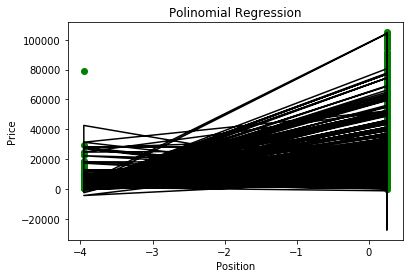

In [43]:
import matplotlib.pyplot as plt

plt.scatter(X_train.registration_yes, y_train, color='Green')
plt.plot(X_train.registration_yes, y_poly_pred_train, color='black')
plt.title('Polinomial Regression')
plt.xlabel('Position')
plt.ylabel('Price')

Text(0,0.5,'Price')

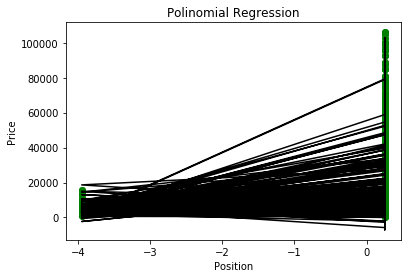

In [44]:
plt.scatter(X_test.registration_yes, y_test, color='Green')
plt.plot(X_test.registration_yes, y_poly_pred_test, color='black')
plt.title('Polinomial Regression')
plt.xlabel('Position')
plt.ylabel('Price')